<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/Lec_6/Keras_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import requests
import io

In [0]:
'''
Let's import the Farsi digits (your assignment)
'''

url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Assignments/A3/X.npz'
s=requests.get(url, stream=True).content
X = np.load(io.BytesIO(s) )['arr_0']
url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Assignments/A3/Y.npz'
s=requests.get(url, stream=True).content
Y = np.load(io.BytesIO(s) )['arr_0']

from sklearn.utils import shuffle
X, Y = shuffle(X,Y, random_state = 0 )

In [3]:
print('Each image is of the form: {}'.format(X[0].shape ) )

Each image is of the form: (32, 32)


In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [6]:
history = model.fit(X_train,Y_train, validation_split=0.25, epochs=5)

Train on 57573 samples, validate on 19191 samples
Epoch 1/5
57573/57573 [==============================] - 8s 130us/sample - loss: 0.1518 - acc: 0.9566 - val_loss: 0.0899 - val_acc: 0.9733
Epoch 2/5
57573/57573 [==============================] - 7s 125us/sample - loss: 0.0568 - acc: 0.9833 - val_loss: 0.0620 - val_acc: 0.9810
Epoch 3/5
57573/57573 [==============================] - 7s 124us/sample - loss: 0.0346 - acc: 0.9896 - val_loss: 0.0617 - val_acc: 0.9811
Epoch 4/5
57573/57573 [==============================] - 7s 124us/sample - loss: 0.0228 - acc: 0.9927 - val_loss: 0.0669 - val_acc: 0.9809
Epoch 5/5
57573/57573 [==============================] - 7s 124us/sample - loss: 0.0163 - acc: 0.9946 - val_loss: 0.0661 - val_acc: 0.9813


In [7]:
Y_predicted = np.argmax( model.predict(X_test) , axis=1 )
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

[[2532    0    0    0    0    4    0    0    0    0]
 [   2 2489    4    0    3    0    6    0    0    7]
 [   2    7 2453   23    3    0    6    1    0    5]
 [   2    0   70 2440   30    1    0    0    0    1]
 [   3    1   32   26 2607    3   16    2    0    2]
 [  19    3    1    2    9 2451    4    0    8    0]
 [   1    1    2    1    1    0 2596    2    1    3]
 [   3    3   12    1    1    3    7 2578    0    0]
 [   3    3    0    0    0    0    7    0 2527    8]
 [   0    5    1    0    0    0   70    0   11 2457]]


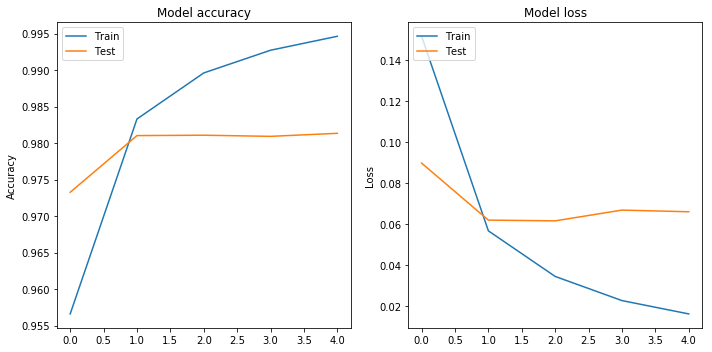

In [8]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [0]:
Y_oh = keras.utils.to_categorical(Y, num_classes=10, dtype=int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
Y_oh[0]

In [0]:
history = model.fit(X_train,Y_train, validation_split=0.25, epochs=10, batch_size=16, verbose=1)

In [0]:
Y_predicted = np.argmax( model.predict(X_test) , axis=1 )
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

In [0]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## Try this for the particle identification problem.

In [10]:
import pandas as pd
url = 'https://www.dropbox.com/s/66dbhxl93y41coe/particle-identification-from-detector-responses.zip?dl=1'
s=requests.get(url, stream=True).content
data=pd.read_csv(io.BytesIO(s) , compression='zip' )
 
'''
Alternatively, you can download the file into your computer and run the following code. 
You need to uncomment it first. 
'''    

# data = pd.read_csv('particle-identification-from-detector-responses.zip', compression='zip')
data.head()

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256


In [12]:
n_s = 10000
targets = list(set(data['id']))
mini_data = data.sample(n_s, axis=0, random_state=0)
mini_data['target'] = mini_data['id'].apply(lambda x: targets.index(x)) 
mini_data.drop('id',axis=1, inplace=True)
mini_data.head()

,p,theta,beta,nphe,ein,eout,target
3748577,1.230330,0.415613,0.985857,0,0.182147,0.058503,1
4555504,0.870680,0.864884,0.989180,0,0.000000,0.000000,1
2388454,1.320670,0.481086,0.806984,0,0.151431,0.115267,2
3738046,0.657969,0.500238,0.982778,0,0.034974,0.055161,1
1572731,1.756310,0.340558,0.993275,0,0.030030,0.167452,1


# Learning rate:
Change the learning rate and plot the results for 

eta = .01, .03, .1, .3, 1

For each one, do 5 runs (5 epoch should be enough. )

Plot and compare them. 

Track the time and report the average learning time for each value of eta. 

# Batch size

Change the Batch_size and plot the results for 

Batch_size = 8, 32, 128, 512, 1024 (change n_epochs too. )

eta =  .03, .1, .3

For each one, do 5 runs (5 epoch should be enough. )

Plot and compare them. 

Track the time and report the average learning time for each value of eta. 

# Optimization techniques

For a fixed batch_size (pick the best from last section) try the three different algorithms that we discussed. Look at 

https://keras.io/optimizers/

for the possible optimizers. 

Try 

eta = .03, .1, .3

For each one, do 5 runs (5 epoch should be enough. )

Plot and compare them. 

Track the time and report the average learning time for each value of eta. 